<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Erosion" data-toc-modified-id="Erosion-1">Erosion</a></span></li><li><span><a href="#Dilation" data-toc-modified-id="Dilation-2">Dilation</a></span></li><li><span><a href="#Hit-or-Miss-theory" data-toc-modified-id="Hit-or-Miss-theory-3">Hit-or-Miss theory</a></span></li><li><span><a href="#Boundary-Extraction" data-toc-modified-id="Boundary-Extraction-4">Boundary Extraction</a></span></li></ul></div>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Erosion
$$
A\ominus B=\{z|( B)_{z} \subseteq A\}
$$

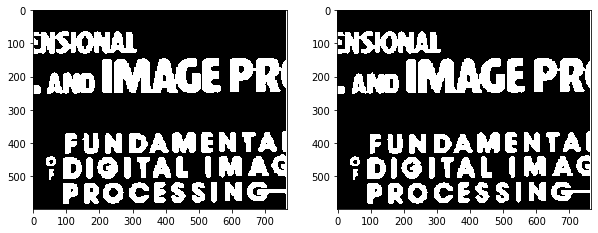

In [3]:
_,img = cv2.threshold(cv2.imread('erosion0.png',0),127,255,cv2.THRESH_BINARY)
erosion = cv2.erode(img,np.ones((2,2),np.uint8),iterations = 1)
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(erosion,cmap='gray')
plt.show()

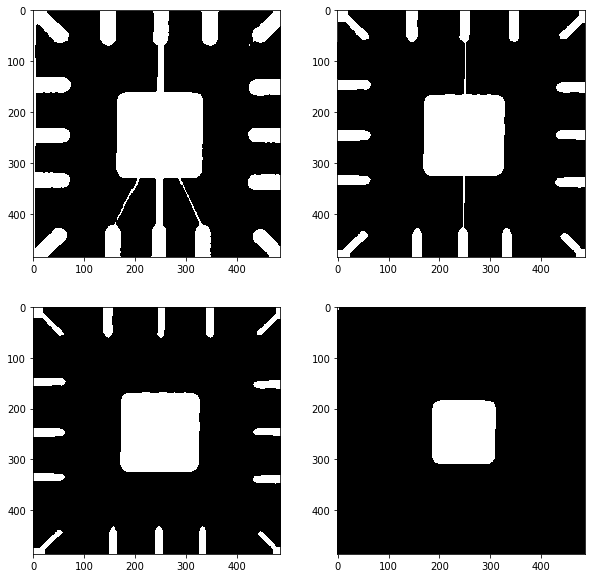

In [4]:
_,img = cv2.threshold(cv2.resize(cv2.imread('erosion1.png',
                                            0),
                                 (486,486)),
                      127,
                      255,
                      cv2.THRESH_BINARY)
kernelSize=[1,11,15,45]
i=1
plt.figure(figsize=(10,10))
for k in kernelSize:
    plt.subplot(2,2,i)
    i+=1
    plt.imshow(cv2.erode(img.copy(),
                         np.ones((k,k),
                                 np.uint8),
                         iterations = 1),
              cmap='gray')
plt.show()

# Dilation
$$
A\oplus B=\{z|(\hat{B})_{z} \cap A\neq \emptyset \}
$$

<class 'numpy.ndarray'>


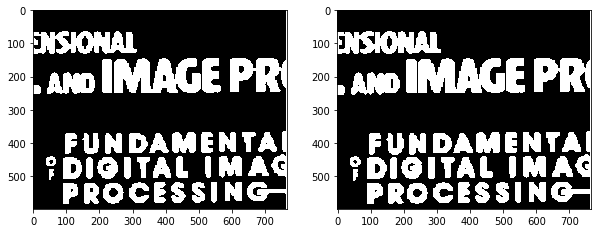

In [52]:
_,img = cv2.threshold(cv2.imread('erosion0.png',0),127,255,cv2.THRESH_BINARY)
print(type(img))
dilation = cv2.dilate(img,np.ones((2,2),np.uint8),iterations = 1)
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dilation,cmap='gray')
plt.show()

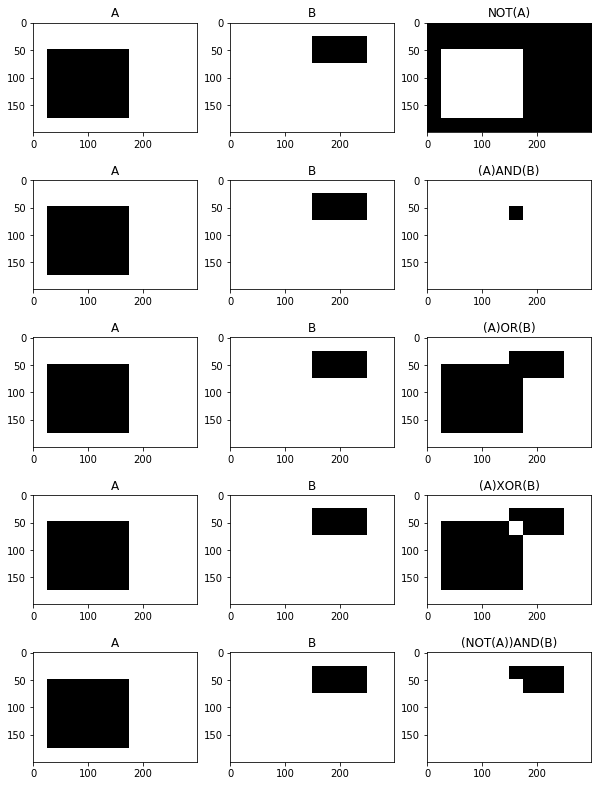

In [6]:
A=(np.zeros((200,300))).astype(np.uint8)
A[50:175,25:175]=1
B=(np.zeros((200,300))).astype(np.uint8)
B[25:75,150:250]=1

operations={'NOT(A)': lambda a,b:np.logical_not(a),
            '(A)AND(B)':lambda a,b: np.logical_and(a,b),
            '(A)OR(B)':lambda a,b:np.logical_or(a,b),
            '(A)XOR(B)':lambda a,b:np.logical_xor(a,b),
            '(NOT(A))AND(B)':lambda a,b: np.logical_and(b,np.logical_not(a)),
           }
i=1
plt.figure(figsize=(len(operations)*2,14))
for opTitle,operation in operations.items():
    for title,img in zip(['A','B',opTitle],[A,B,operation(A,B)]):
        plt.subplot(len(operations),3,i)
        i+=1
        plt.imshow(np.logical_not(img),cmap='gray')
        plt.title(title)
        
plt.show()


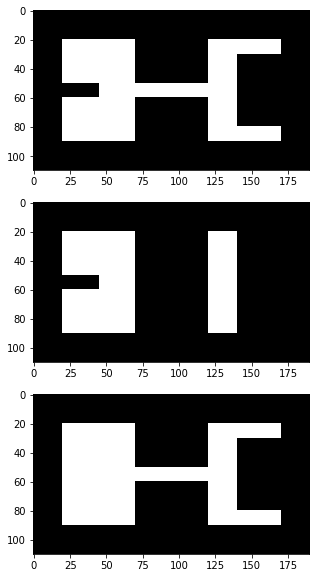

In [14]:
img=255 *np.zeros((110,190), np.uint8)
k=1
img[20:50,20:70]=1
img[50:60,45:120]=1
img[60:90,20:70]=1
img[20:90,120:140]=1
img[20:30,120:170]=1
img[80:90,120:170]=1
img=cv2.resize(img,(int(190*k),int(110*k)))
x=11
kernel =np.ones((x,x),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(5,10))
plt.subplot(3,1,1)
plt.imshow(img,cmap='gray')
plt.subplot(3,1,2)
plt.imshow(opening,cmap='gray')
plt.subplot(3,1,3)
plt.imshow(closing,cmap='gray')
plt.show()

# Hit-or-Miss theory
$$
A\otimes B=( A\ominus B_{1}) \cap \left( A^{c} \ominus B_{2}\right)
$$

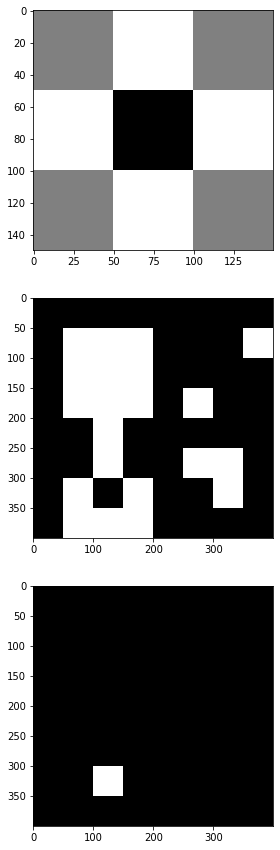

In [18]:
input_image = np.array((
    [0, 0  , 0  , 0  , 0, 0  , 0  , 0  ],
    [0, 255, 255, 255, 0, 0  , 0  , 255],
    [0, 255, 255, 255, 0, 0  , 0  , 0  ],
    [0, 255, 255, 255, 0, 255, 0  , 0  ],
    [0, 0  , 255, 0  , 0, 0  , 0  , 0  ],
    [0, 0  , 255, 0  , 0, 255, 255, 0  ],
    [0, 255, 0  , 255, 0, 0  , 255, 0  ],
    [0, 255, 255, 255, 0, 0  , 0  , 0  ]), dtype="uint8")
kernel = np.array((
        [0, 1 , 0],
        [1, -1, 1],
        [0, 1 , 0]), dtype="int")
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)
rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)
kernel = cv2.resize(kernel, 
                    None, 
                    fx = rate, 
                    fy = rate, 
                    interpolation = cv2.INTER_NEAREST)
plt.figure(figsize=(5,15))
plt.subplot(3,1,1)
plt.imshow(kernel,cmap='gray')
input_image = cv2.resize(input_image, 
                         None, 
                         fx = rate, 
                         fy = rate, 
                         interpolation = cv2.INTER_NEAREST)
plt.subplot(3,1,2)
plt.imshow(input_image,cmap='gray')
output_image = cv2.resize(output_image, 
                          None , 
                          fx = rate, 
                          fy = rate, 
                          interpolation = cv2.INTER_NEAREST)
plt.subplot(3,1,3)
plt.imshow(output_image,cmap='gray')
plt.show()

# Boundary Extraction
$$
\beta ( A) =A-( A\ominus B)
$$

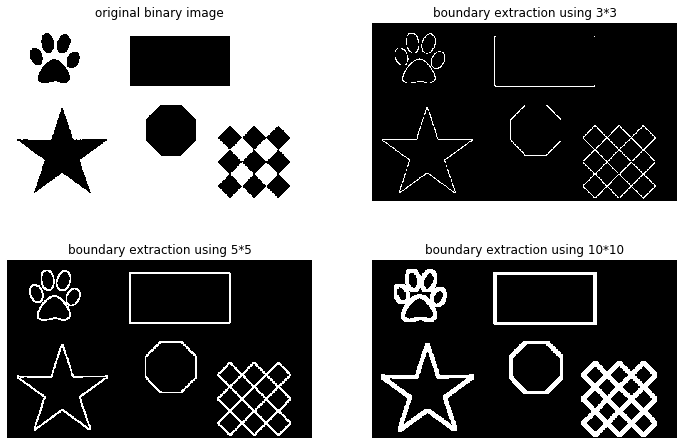

In [35]:
_,img=cv2.threshold(cv2.imread("shapes.png",0),127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(12,8))
k=1
plt.subplot(2,2,k)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.title('original binary image')
for i in [3,5,10]:
    gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((i,i),np.uint8))
    k+=1
    plt.subplot(2,2,k)
    plt.imshow(gradient,cmap='gray')
    plt.title(f'boundary extraction using {i}*{i}')
    plt.axis(False)
plt.show()

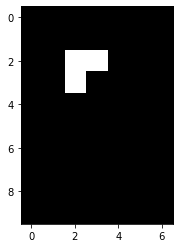

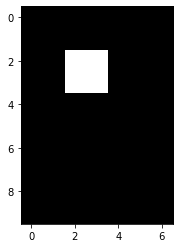

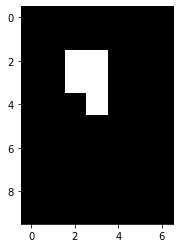

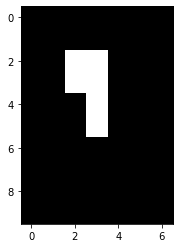

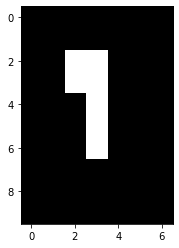

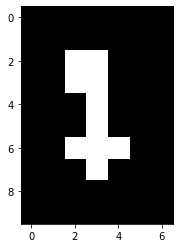

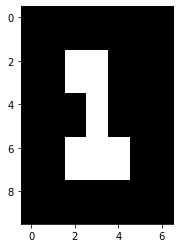

In [96]:
img=np.array([[0,0,0,0,0,0,0],
             [0,0,1,1,0,0,0],
             [0,1,0,0,1,0,0],
             [0,1,0,0,1,0,0],
             [0,0,1,0,1,0,0],
             [0,0,1,0,1,0,0],
             [0,1,0,0,0,1,0],
             [0,1,0,0,0,1,0],
             [0,1,1,1,1,0,0],
             [0,0,0,0,0,0,0]],np.uint8)
X=img*0
X[2,2]=1
kernel=np.array([[0,1,0],
                 [1,1,1],
                 [0,1,0]],dtype=np.uint8)
# kernel = (kernel + 1) * 127
while 1:
    newX=np.logical_and(cv2.dilate(X,
                                   kernel,
                                   iterations=1),
                        np.logical_not(img)).astype(np.uint8)
    if (newX==X).all():
        break
    X=newX
    plt.imshow(X,cmap='gray')
    plt.show()
   